# Multiple Linear Regression

In [1]:
# Importing required libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the file containing the data

data = pd.read_csv(r'E:\ESE 588 Pattern Recognition\data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# Performing data slicing

data_mod = data[data['Position'] == 'GK']
data_mod1 = data_mod.loc[:, ['Name', 'Position', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Jumping', 'ShotPower', 'Reactions', 'Vision', 'Composure', 'Overall']]
data_mod2 = data_mod1.iloc[0:500,:]
(data_mod2)

,Name,Position,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Jumping,ShotPower,Reactions,Vision,Composure,Overall
3,De Gea,GK,90.0,85.0,87.0,88.0,94.0,67.0,31.0,90.0,68.0,68.0,91
9,J. Oblak,GK,86.0,92.0,78.0,88.0,89.0,76.0,22.0,86.0,70.0,70.0,90
18,M. ter Stegen,GK,87.0,85.0,88.0,85.0,90.0,79.0,22.0,85.0,69.0,69.0,89
19,T. Courtois,GK,85.0,91.0,72.0,86.0,88.0,68.0,36.0,84.0,44.0,66.0,89
22,M. Neuer,GK,90.0,86.0,91.0,87.0,87.0,77.0,25.0,84.0,70.0,70.0,89
37,H. Lloris,GK,88.0,84.0,68.0,83.0,92.0,74.0,23.0,85.0,30.0,65.0,88
40,S. Handanovič,GK,87.0,86.0,69.0,89.0,89.0,78.0,22.0,83.0,41.0,69.0,88
41,G. Buffon,GK,88.0,87.0,74.0,90.0,83.0,75.0,39.0,79.0,50.0,70.0,88
46,K. Navas,GK,90.0,81.0,75.0,82.0,90.0,74.0,21.0,84.0,68.0,67.0,87
57,Ederson,GK,85.0,80.0,91.0,82.0,87.0,58.0,42.0,86.0,67.0,70.0,86


In [4]:
# Considering only required parameters since the others do not seem to hold linear relationships with the output

data_mod2.drop(['Jumping', 'ShotPower', 'Vision', 'Composure'], axis = 1, inplace = True)
data_mod2

,Name,Position,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Reactions,Overall
3,De Gea,GK,90.0,85.0,87.0,88.0,94.0,90.0,91
9,J. Oblak,GK,86.0,92.0,78.0,88.0,89.0,86.0,90
18,M. ter Stegen,GK,87.0,85.0,88.0,85.0,90.0,85.0,89
19,T. Courtois,GK,85.0,91.0,72.0,86.0,88.0,84.0,89
22,M. Neuer,GK,90.0,86.0,91.0,87.0,87.0,84.0,89
37,H. Lloris,GK,88.0,84.0,68.0,83.0,92.0,85.0,88
40,S. Handanovič,GK,87.0,86.0,69.0,89.0,89.0,83.0,88
41,G. Buffon,GK,88.0,87.0,74.0,90.0,83.0,79.0,88
46,K. Navas,GK,90.0,81.0,75.0,82.0,90.0,84.0,87
57,Ederson,GK,85.0,80.0,91.0,82.0,87.0,86.0,86


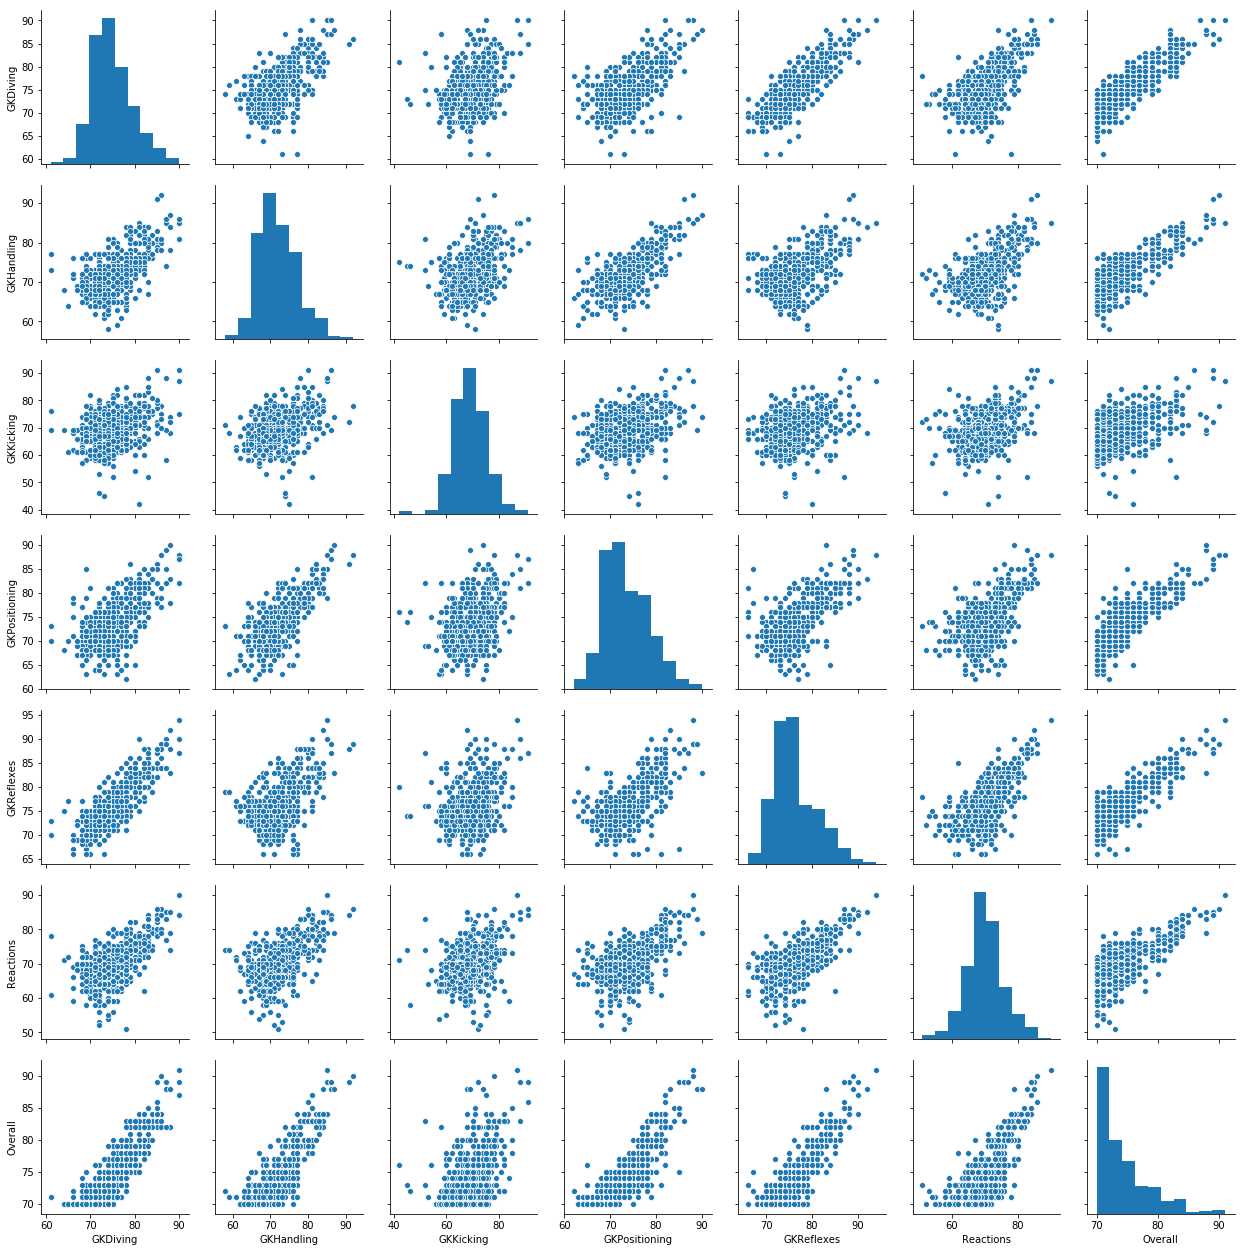

In [5]:
# Displaying pairplots using seaborn library

sb.pairplot(data_mod2)

In [6]:
X = data_mod2.iloc[:,2:8]
Y = data_mod2.iloc[:,-1]

In [7]:
# Splitting data into training and testing sets

from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(X, Y, train_size = 0.8, random_state = 0, shuffle = True, stratify = None)

In [8]:
# Importing library for performing linear regression

from sklearn.linear_model import LinearRegression as lr
regressor = lr()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Predicting the output

Y_pred = regressor.predict(X_test)
Y_pred

array([78.66324996, 73.34045352, 72.84934528, 70.06012933, 69.76210319,
       84.00903776, 71.92781131, 70.16112377, 74.68390326, 76.14236671,
       73.44254685, 73.44768575, 70.56921162, 72.98251448, 75.27792857,
       71.8860627 , 69.53181002, 72.44794865, 75.58745613, 82.03665685,
       74.32332936, 70.67026173, 73.39433923, 76.70884066, 80.93545597,
       69.60874573, 83.76879961, 71.31685826, 78.08513976, 73.65437012,
       71.2401983 , 77.58658893, 76.53464235, 75.38736948, 71.35032108,
       69.46734804, 72.18995843, 70.28311316, 72.38862952, 74.50806897,
       72.28920855, 80.83503313, 71.44411864, 74.44442669, 78.82237845,
       89.46404758, 74.12279672, 71.77558591, 71.17897828, 77.48247638,
       71.07147959, 74.65151425, 72.17199714, 75.68975232, 76.57481213,
       84.68076144, 72.33872191, 75.48010912, 74.35407593, 72.0657998 ,
       78.72370985, 72.70389215, 71.19281674, 70.61798348, 71.73252399,
       75.21546948, 85.41127247, 69.50215647, 73.36456842, 79.72

In [10]:
# Computing r2 score

from sklearn.metrics import r2_score
score = r2_score(Y_test, Y_pred)
print('r2 score is', score)

r2 score is 0.9913856313602718


In [11]:
# Displaying statsmodels

import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.077e+04
Date:                Sat, 20 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:59:44   Log-Likelihood:                -204.23
No. Observations:                 500   AIC:                             422.5
Df Residuals:                     493   BIC:                             452.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9173      0.302     -3.035      0.003      -1.511      -0.324
GKDiving          0.2103      0.006     32.930      0.000       0.198       0.223
GKHandling        0.2228      0.005     45.518      0.000       0.213       0.232
GKKicking         0.0493      0.003     17.844      0.000       0.044       0.055
GKPositioning     0.2115      0.005     39.231      0.000       0.201       0.222
GKReflexes        0.2207      0.007     33.347      0.000       0.208       0.234
Reactions         0.1117      0.004     28.868      0.000       0.104       0.119
==============================================================================
Omnibus:                       11.192   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.647
Skew:                           0.372   Prob(JB):                      0.00296
Kurtosis:                       2.919   Cond. No.                     3.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""